In [1]:
import requests

In [2]:
import numpy as np

In [3]:
set(requests.get('http://localhost:8000/v2/models/query_classify_ensemble/config').json())

{'error'}

In [2]:
input_json = {
   "inputs":[
      {	
      "name": "text",
      "shape": [2,1],
      "datatype": "BYTES",
      "data": [['hello' * 2], ['bye']]
      }
   ]
}

In [3]:
res = requests.post('http://localhost:8000/v2/models/clip_text_tokenizer/versions/1/infer', json=input_json).json()

In [4]:
set(res)

{'model_name', 'model_version', 'outputs'}

In [5]:
res

{'model_name': 'clip_text_tokenizer',
 'model_version': '1',
 'outputs': [{'name': 'input_ids',
   'datatype': 'INT64',
   'shape': [2, 50],
   'data': [101,
    61694,
    25686,
    24829,
    102,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    101,
    10155,
    10112,
    102,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0,
    0]},
  {'name': 'attention_mask',
   'datatype': 'INT64',
   'shape': [2, 50],
   'data': [1,
    1,
    1,
    1,
    1,
    

In [79]:
input_json = {
   "inputs":[
      {	
         "name": "input_ids",
         "shape": [1, 4],
         "datatype": "INT64",
         "data": [[1, 1, 1, 1]]
      },
      {	
         "name": "attention_mask",
         "shape": [1, 4],
         "datatype": "INT64",
         "data": [[1, 1, 1, 1]]
      }
   ]
}

In [80]:
res = requests.post('http://localhost:8000/v2/models/query_classify_onnx/versions/1/infer', json=input_json).json()

In [81]:
set(res)

{'model_name', 'model_version', 'outputs'}

In [127]:
input_json = {
   "inputs":[
      {	
      "name": "text",
      "shape": [1,1],
      "datatype": "BYTES",
      "data": ['Classify query: rothco 40139/40169/40 lt;wbr gt;129/40239/4015 lt;wbr gt;9/40125/41129 molle ii 3-day assault pack']
      }
   ]
}

In [128]:
res = requests.post('http://localhost:8000/v2/models/query_classify_ensemble/versions/1/infer', json=input_json).json()

In [129]:
set(res)

{'model_name', 'model_version', 'outputs', 'parameters'}

In [215]:
input_json = {
   "inputs":[
      {	
      "name": "text",
      "shape": [64,1],
      "datatype": "BYTES",
      "data": ['Classify query: dildo'] * 64
      }
   ]
}

In [216]:
res = requests.post('http://coeus-gpu-multitask-ml-dev.service.consul:8081/v2/models/query_classify_ensemble/versions/1/infer', json=input_json).json()

In [217]:
res

{'model_name': 'query_classify_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'weights',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['0.9913872741634293,0.041354320304082794,0.012661241504828174,0.0028439047863669646,0.0026740422460652643,0.002666802230467729,0.0021832118795518662,0.0021646143962891647,0.00209828174567186,0.0020010979724855112',
    '0.9730964170194983,0.16338344685905343,0.04844044228406595,0.016988948668499995,0.013814002133392046,0.013090193619753655,0.0038075623246409764,0.003753926175974252,0.003585217032781402,0.0034202455861947778']},
  {'name': 'categories',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['1143,1134,1159,1118,1156,1153,1115,1139,1138,1158',
    '1316,1255,1245,1273,1313,1285,1264,1458,1308,1279']}]}

In [16]:
res['parameters']

{'sequence_id': 0, 'sequence_start': False, 'sequence_end': False}

In [116]:
# model-analyzer profile --config-file model_analyzer.yaml --override-output-model-repository --run-config-search-mode quick

In [ ]:
# perf_analyzer -m query_classify_onnx -u coeus-gpu-multitask-ml-stage.service.consul:8081 --shape input_ids:64 --shape attention_mask:64 --concurrency-range 1:10 --percentile 95 -i grpc

In [ ]:
# perf_analyzer -m query_classify_ensemble --concurrency-range 1:10

# clip

In [65]:
input_json = {
   "inputs":[
      {	
      "name": "image_url",
      "shape": [1,1],
      "datatype": "BYTES",
      "data": ['http://images.cocodataset.org/val2017/000000039769.jpg']
      }
   ]
}

In [66]:
res = requests.post('http://coeus-gpu-multitask-ml-dev.service.consul:8081/v2/models/clip_image_ensemble/versions/1/infer', json=input_json).json()

In [67]:
np.array(res['outputs'][0]['data']).reshape(64,-1)

array([[0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113],
       [0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113],
       [0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113],
       ...,
       [0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113],
       [0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113],
       [0.58728105, 0.58728105, 0.61647785, ..., 0.7949909 , 0.86609119,
        0.85187113]])

In [46]:
input_json = {
   "inputs":[
      {	
      "name": "pixel_values",
      "shape": [2, 3, 224, 224],
      "datatype": "FP32",
      "data": [0.] * (2 * 3 * 224 * 224)
      }
   ]
}

In [47]:
res = requests.post('http://localhost:8000/v2/models/clip_image_onnx/versions/1/infer', json=input_json).json()

In [48]:
set(res)

{'error'}

In [49]:
input_json = {
   "inputs":[
      {	
      "name": "image_url",
      "shape": [1, 1],
      "datatype": "BYTES",
      "data": ['http://images.cocodataset.org/val2017/000000039769.jpg']
      }
   ]
}

In [50]:
res = requests.post('http://coeus-gpu-multitask-ml-dev.service.consul:8081/v2/models/clip_image_preprocessor/versions/1/infer', json=input_json).json()

In [51]:
set(res)

{'model_name', 'model_version', 'outputs'}

In [11]:
input_json = {
   "inputs":[
      {	
      "name": "image_url",
      "shape": [2, 1],
      "datatype": "BYTES",
      "data": ["dummy", "http://images.cocodataset.org/val2017/000000039769.jpg"]
      }
   ]
}

In [12]:
res = requests.post('http://localhost:8000/v2/models/clip_image_ensemble/versions/1/infer', json=input_json).json()

In [13]:
set(res)

{'model_name', 'model_version', 'outputs', 'parameters'}

In [14]:
res['outputs']

[{'name': 'image_download_success',
  'datatype': 'BOOL',
  'shape': [2, 1],
  'data': [False, True]},
 {'name': 'pooler_output',
  'datatype': 'FP32',
  'shape': [2, 512],
  'data': [-0.150348961353302,
   -0.2633885443210602,
   -0.5655118227005005,
   -0.07222479581832886,
   0.15578706562519073,
   -0.04308390989899635,
   -0.3871208727359772,
   1.2720789909362793,
   0.2835938334465027,
   0.27378612756729126,
   0.5060480833053589,
   -0.15571236610412598,
   0.35334670543670654,
   0.014747440814971924,
   -0.142838716506958,
   0.11168186366558075,
   0.10963201522827148,
   0.15257017314434052,
   0.03197997808456421,
   0.3711305260658264,
   0.38413870334625244,
   0.1560484766960144,
   -0.08011441677808762,
   -0.04144369810819626,
   -0.11277960985898972,
   -0.19827577471733093,
   -0.420196533203125,
   -0.04788585007190704,
   0.35359495878219604,
   -0.3278558552265167,
   -0.18915945291519165,
   0.1651381552219391,
   -0.2811001241207123,
   -0.029136311262845993,


In [69]:
title = ["Gamepad For Xbox 360 Wireless Controller For XBOX 360 Controle Wireless Joystick For XBOX360 Console",
         "Neverland Waterproof 190T M/L/XL/XXL/XXXL190T Quad Bike ATV ATC Ourdoor Indoor Cover with Storage Bag"]
description = ["""
For xbox 360 wireless controller, with dual vibration and headphone jack, wireless connect to xbox 360 conole, need the PC reciever（not included） to connect with PC, it requires 2 AA batteries (not included).
""",
"""ArithmeticErrorFeatures:
1. Our unique Heavy duty UV & Water repellent treated fabrics covers is protects against rain, wind, snow, sun, bird poop, tree sap and dirt and won't crack in cold weather,protect UTV from sun,rain,water damage.
2. Front and back elastic cord sewn in the bottom for tight fit.All seams are top stitched with heavy duty nylon thread.
3. Reflective Striping in Four sides, which is easy to Storage and helps your ATV get noticed at Night.
4. Tied & Bandage Preventing cover is blown off,can also be integrated trailering system with quick adjusting straps and buckles.
5. FRONT Mark: It's convenient to install the cover in your ATV.

Size:
M Size: 145*85*98cm/57.09*33.46*38.58inch;
L Size: 200*95*106cm/78.74x37.4x41.73inch;
XL Size: 210*120*115cm/82.68*47.24*45.28inch;
XXL Size: 220*98*106cm/86.61*38.58*41.73inch;
XXXL Size: 256*110*120cm/100.79*43.31*47.24inch.

Color:
Camouflage/Black (exterior) & White (interior)/Black/Silver & Black

Package included:
1 * ATV Cover
1 * Storage Bag
"""]
text = [x + ' ' + y for x, y in zip(title, description)]

In [70]:
input_json = {
   "inputs":[
      {	
      "name": "text",
      "shape": [2,1],
      "datatype": "BYTES",
      "data": [text[0], text[1]]
      }
   ]
}

In [71]:
input_json

{'inputs': [{'name': 'text',
   'shape': [2, 1],
   'datatype': 'BYTES',
   'data': ['Gamepad For Xbox 360 Wireless Controller For XBOX 360 Controle Wireless Joystick For XBOX360 Console \nFor xbox 360 wireless controller, with dual vibration and headphone jack, wireless connect to xbox 360 conole, need the PC reciever（not included） to connect with PC, it requires 2 AA batteries (not included).\n',
    "Neverland Waterproof 190T M/L/XL/XXL/XXXL190T Quad Bike ATV ATC Ourdoor Indoor Cover with Storage Bag ArithmeticErrorFeatures:\n1. Our unique Heavy duty UV & Water repellent treated fabrics covers is protects against rain, wind, snow, sun, bird poop, tree sap and dirt and won't crack in cold weather,protect UTV from sun,rain,water damage.\n2. Front and back elastic cord sewn in the bottom for tight fit.All seams are top stitched with heavy duty nylon thread.\n3. Reflective Striping in Four sides, which is easy to Storage and helps your ATV get noticed at Night.\n4. Tied & Bandage Preven

In [83]:
res = requests.post('http://coeus-gpu-multitask-ml-dev.service.consul:8081/v2/models/product_classify_ensemble/versions/1/infer', json=input_json).json()

In [81]:
res

{'model_name': 'product_classify_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'weights',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['0.7028484659392799,0.06905530712307366,0.061046178329588335,0.054564508235713516,0.008542020441972338,0.0045114970405030885,0.0025336407025353842,0.002055791049182524,0.001343383707541352,0.0007936096300049557',
    '0.5292616484772504,0.44794982712397924,0.09008527411919379,0.010589976095126937,0.0033745093286150626,0.0031370405079130864,0.002435553005083381,0.002428864700065382,0.0021473895185561477,0.0020973823442772873']},
  {'name': 'categories',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['1789,1807,1800,1792,1774,1773,1790,1806,1803,1808',
    '107,777,658,134,774,111,820,4948,750,772']}]}

In [84]:
res_truncate50 = requests.post('http://localhost:8000/v2/models/product_classify_ensemble/versions/1/infer', json=input_json).json()

In [85]:
res_truncate50

{'model_name': 'product_classify_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'weights',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['0.7541066221157274,0.10480984969581836,0.07723887128108783,0.03093157649329156,0.008714242623846482,0.003677652705418454,0.0022838459852227277,0.0022248577514014903,0.0012811688464996085,0.0006897896737918014',
    '0.35640033638100954,0.1781837274051803,0.017773321318818473,0.016076129576448734,0.008373600793837642,0.005922683084304175,0.0042719060696537955,0.0042119264769701825,0.004192229038785732,0.0033276631188188265']},
  {'name': 'categories',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['1789,1807,1792,1800,1774,1773,1790,1806,1803,1808',
    '777,107,134,658,774,794,820,4948,782,772']}]}

In [86]:
res_truncate100 = requests.post('http://localhost:8000/v2/models/product_classify_ensemble/versions/1/infer', json=input_json).json()

In [87]:
res_truncate100

{'model_name': 'product_classify_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'weights',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['0.7028484659392799,0.06905530712307366,0.061046178329588335,0.054564508235713516,0.008542020441972338,0.0045114970405030885,0.0025336407025353842,0.002055791049182524,0.001343383707541352,0.0007936096300049557',
    '0.85455973764708,0.08300091673038408,0.042328592405167745,0.007603663528436415,0.006049789787642306,0.0037156315269769513,0.003096368677619352,0.0025666225401510694,0.002519210127456588,0.0023308918054273336']},
  {'name': 'categories',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['1789,1807,1800,1792,1774,1773,1790,1806,1803,1808',
    '777,658,107,774,134,4948,783,820,794,670']}]}

In [78]:
res_trt = requests.post('http://localhost:8000/v2/models/product_classify_ensemble/versions/1/infer', json=input_json).json()

In [79]:
res_trt

{'model_name': 'product_classify_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'weights',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['0.45853054058329273,0.17866909363203173,0.018905447141346704,0.011288073899230987,0.005301894869402149,0.0027469009484408103,0.0024154832575663415,0.0019494021275301956,0.001585430675821233,0.0011925492802088101',
    '0.4262021771719622,0.4195884939160214,0.01826427835185701,0.006903838071221878,0.0053640566906201104,0.004198795271471868,0.0032350559690690625,0.003160352815071338,0.003027835024568379,0.0027576223673954096']},
  {'name': 'categories',
   'datatype': 'BYTES',
   'shape': [2],
   'data': ['1789,1800,1807,1792,1773,1803,1774,1790,1748,4798',
    '777,107,658,731,820,134,772,750,781,111']}]}

In [54]:
import json
with open('tmp.json', 'w') as f:
    f.write(json.dumps(res))

In [35]:
input_json = {
   "inputs":[
      {	
      "name": "input_ids",
      "shape": [1,512],
      "datatype": "INT32",
      "data": [1] * 512
      },
      {	
      "name": "attention_mask",
      "shape": [1,512],
      "datatype": "INT32",
      "data": [1] * 512
      }
   ]
}

In [36]:
res = requests.post('http://localhost:8000/v2/models/product_classify_onnx/versions/1/infer', json=input_json).json()

In [25]:
test_logits_correct = [-9.443811,
 -14.139772,
 -15.012204,
 -15.310661,
 -17.811775,
 -19.201508,
 -16.38789,
 -17.176933,
 -15.558202,
 -16.672365,
 -15.50977,
 -17.519842,
 -15.541917,
 -13.692507,
 -16.669786,
 -16.098969,
 -17.114933,
 -15.286218,
 -16.903736,
 -15.618131,
 -15.07967,
 -20.3643,
 -16.799364,
 -15.0339775,
 -21.264908]

In [37]:
test_logits_correct = [-10.906804,
 -14.027181,
 -13.062684,
 -14.76141,
 -16.269384,
 -18.846043,
 -15.17743,
 -15.700052,
 -15.103302,
 -17.725416,
 -15.161037,
 -16.75056,
 -15.054659,
 -14.217253,
 -15.55386,
 -16.164122,
 -17.903976,
 -16.322308,
 -16.976015,
 -15.864368,
 -14.910152,
 -18.74367,
 -16.041048,
 -14.287062,
 -21.97736,]

In [38]:
import matplotlib.pyplot as plt

(array([ 1.,  0.,  0.,  0.,  1.,  1.,  8., 10.,  2.,  2.]),
 array([-0.02264  , -0.0187951, -0.0149502, -0.0111053, -0.0072604,
        -0.0034155,  0.0004294,  0.0042743,  0.0081192,  0.0119641,
         0.015809 ]),
 <BarContainer object of 10 artists>)

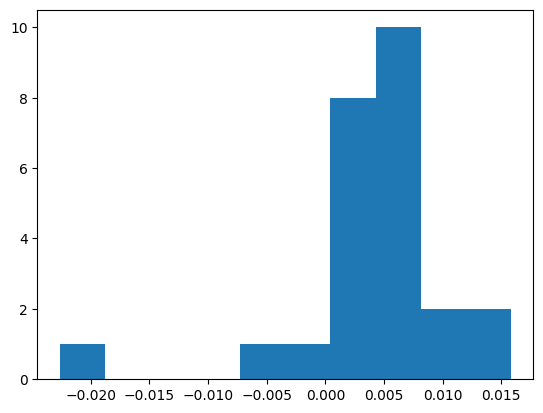

In [39]:
plt.hist(np.array(res['outputs'][0]['data'][:len(test_logits_correct)]) -  np.array(test_logits_correct))

In [97]:
input_json = {
   "inputs":[
      {	
      "name": "text",
      "shape": [2,1],
      "datatype": "BYTES",
      "data": ["Represent the E-commerce search query for retrieval: sex toy", 
               "Represent the E-commerce search query for retrieval: food"]
      }
   ]
}

In [98]:
res = requests.post('http://coeus-gpu-multitask-ml-dev.service.consul:8081/v2/models/text_emb_ensemble/versions/1/infer', json=input_json).json()

In [102]:
np.array(res['outputs'][0]['data']).reshape(2,-1)

array([[ 0.10437012,  1.11914062, -0.06140137, ...,  0.3269043 ,
         0.112854  , -0.20874023],
       [ 1.72558594,  1.90527344,  1.43164062, ..., -1.25976562,
         0.11883545,  0.64111328]])

In [3]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image, ImageFile
import requests
import torch

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
img_model = SentenceTransformer('clip-ViT-B-32')
text_model = SentenceTransformer('sentence-transformers/clip-ViT-B-32-multilingual-v1')


In [5]:
text_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: DistilBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Dense({'in_features': 768, 'out_features': 512, 'bias': False, 'activation_function': 'torch.nn.modules.linear.Identity'})
)

In [6]:
def load_image(url_or_path):
    if url_or_path.startswith("http://") or url_or_path.startswith("https://"):
        return Image.open(requests.get(url_or_path, stream=True).raw)
    else:
        return Image.open(url_or_path)

In [7]:
img_paths = [
    # Dog image
    "https://unsplash.com/photos/QtxgNsmJQSs/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjM1ODQ0MjY3&w=640",

    # Cat image
    "https://unsplash.com/photos/9UUoGaaHtNE/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8Mnx8Y2F0fHwwfHx8fDE2MzU4NDI1ODQ&w=640",

    # Beach image
    "https://unsplash.com/photos/Siuwr3uCir0/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8NHx8YmVhY2h8fDB8fHx8MTYzNTg0MjYzMg&w=640"
]

images = [load_image(img) for img in img_paths]

# Map images to the vector space
img_embeddings = img_model.encode(images)

# Now we encode our text:
texts = [
    "A dog in the snow",
    "Eine Katze",  # German: A cat
    "Una playa con palmeras."  # Spanish: a beach with palm trees
]

text_embeddings = text_model.encode(texts)


In [8]:
url = img_paths[0]

# get HF image fearures
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, return_tensors="pt")

outputs = model.get_image_features(**inputs)
pooled_output_hf = outputs.detach().cpu().numpy()

# get OpenAI image features
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
image = preprocess(Image.open(requests.get(url, stream=True).raw)).unsqueeze(0).to(device)


with torch.no_grad():
   image_features = model.encode_image(image)
pooled_output_clip = image_features.detach().cpu().numpy()

# check difference
assert np.allclose(pooled_output_hf, pooled_output_clip, atol=0.1), "hf and clip too different"

(array([  2.,   0.,   1.,   3.,  25., 115., 181., 132.,  48.,   5.]),
 array([-0.00363025, -0.0030903 , -0.00255034, -0.00201038, -0.00147043,
        -0.00093047, -0.00039052,  0.00014944,  0.00068939,  0.00122935,
         0.0017693 ]),
 <BarContainer object of 10 artists>)

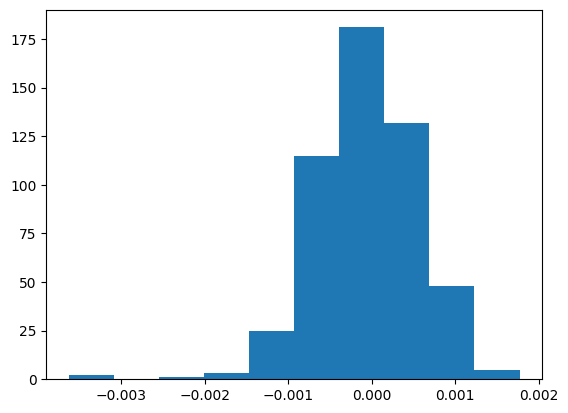

In [110]:
plt.hist((pooled_output_clip - pooled_output_hf).reshape(-1))

(array([  3.,   0.,  12.,  87., 184., 135.,  76.,  12.,   1.,   2.]),
 array([-3.63588333e-06, -2.90274625e-06, -2.16960916e-06, -1.43647196e-06,
        -7.03334820e-07,  2.98023224e-08,  7.62939464e-07,  1.49607661e-06,
         2.22921381e-06,  2.96235089e-06,  3.69548798e-06]),
 <BarContainer object of 10 artists>)

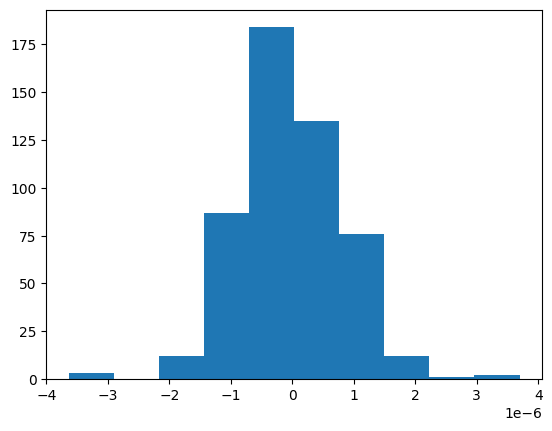

In [112]:
plt.hist((img_embeddings[0] - pooled_output_hf).reshape(-1))

(array([  5.,  48., 132., 181., 115.,  25.,   3.,   1.,   0.,   2.]),
 array([-0.00177145, -0.00123164, -0.00069184, -0.00015203,  0.00038778,
         0.00092758,  0.00146739,  0.0020072 ,  0.002547  ,  0.00308681,
         0.00362661]),
 <BarContainer object of 10 artists>)

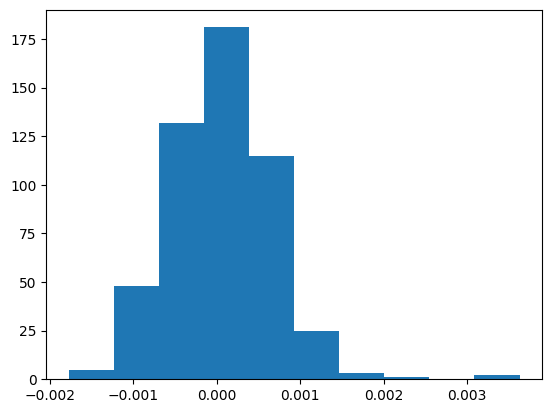

In [113]:
plt.hist((img_embeddings[0] - pooled_output_clip).reshape(-1))

In [9]:
url = "https://canary.contestimg.wish.com/api/webimage/61b241a3a4ee2ecaf2f63c77-large.jpg?cache_buster=bbeee1fdb460a1d12bc266824914e030"

input_json = {
   "inputs":[
      {	
      "name": "image_url",
      "shape": [1,1],
      "datatype": "BYTES",
      "data": [url]
      }
   ]
}

In [13]:
res = requests.post(
    'http://localhost:8000/v2/models/clip_image_ensemble/versions/1/infer', 
    json=input_json
).json()

In [18]:
import requests

# get OpenAI image features
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model2, preprocess = clip.load("ViT-B/32", device=device)
model2.eval()
image = preprocess(Image.open(requests.get(url, stream=True).raw)).unsqueeze(0).to(device)


with torch.no_grad():
   image_features = model2.encode_image(image)
pooled_output_clip = image_features.detach().cpu().numpy()

In [19]:
pooled_output_clip

array([[ 4.3506e-01,  3.2446e-01, -4.2389e-02,  2.4353e-01, -2.7435e-02,
        -3.2776e-02, -2.2461e-01,  3.1177e-01,  6.7285e-01,  7.4023e-01,
        -2.8229e-02, -1.4490e-01, -8.5815e-02, -9.4873e-01,  2.7954e-01,
        -2.8564e-01,  4.7559e-01, -1.2598e-03,  3.5229e-01, -2.7344e-01,
         5.5176e-01, -6.0028e-02,  4.4556e-01, -5.6152e-01,  1.0083e-01,
         1.8225e-01,  8.9355e-02, -4.9927e-01, -7.5684e-01, -1.7993e-01,
        -1.2085e-01,  1.5430e-01, -9.2468e-02, -1.3391e-01, -2.9712e-01,
        -2.3401e-01, -3.8757e-02, -3.1128e-01, -1.7407e-01,  7.7002e-01,
        -1.9836e-01, -1.9730e-02,  2.8369e-01, -2.2217e-01,  4.2798e-01,
         7.6611e-01, -1.4496e-02,  2.3193e-01,  8.5449e-02, -7.5293e-01,
         2.6392e-01,  6.8420e-02, -1.3237e-02,  1.3332e-03, -3.7048e-02,
         6.4148e-02,  1.6101e-01, -9.4727e-02, -1.5857e-01,  2.6001e-01,
         1.9788e-01, -1.3101e-04, -2.5293e-01,  7.0947e-01,  3.9612e-02,
        -2.1469e-02, -6.3049e-02, -9.9365e-01, -6.3

In [17]:
np.array(res['outputs'][1]['data'])

array([ 4.35890138e-01,  3.24306726e-01, -4.23445180e-02,  2.41944015e-01,
       -2.65109912e-02, -3.32967117e-02, -2.24764273e-01,  3.12130958e-01,
        6.72837555e-01,  7.41457224e-01, -2.87012309e-02, -1.45267725e-01,
       -8.65793079e-02, -9.48280573e-01,  2.78420746e-01, -2.85007447e-01,
        4.75627184e-01, -2.86042690e-04,  3.52400601e-01, -2.72365689e-01,
        5.51057339e-01, -6.16558790e-02,  4.45706218e-01, -5.61443448e-01,
        1.00698255e-01,  1.82684720e-01,  9.00521725e-02, -4.98601258e-01,
       -7.56281316e-01, -1.80215240e-01, -1.20415181e-01,  1.53573245e-01,
       -9.37552452e-02, -1.32687122e-01, -2.99725562e-01, -2.34728992e-01,
       -3.75629663e-02, -3.11240733e-01, -1.74824387e-01,  7.70781577e-01,
       -1.99024364e-01, -1.94459409e-02,  2.83255219e-01, -2.22602874e-01,
        4.26362187e-01,  7.69049287e-01, -1.35820657e-02,  2.32299060e-01,
        8.54015946e-02, -7.53459930e-01,  2.64139175e-01,  6.95236549e-02,
       -1.39592588e-02,  

In [21]:
np.allclose(np.array(res['outputs'][1]['data']), pooled_output_clip, atol=1e-2)

True

In [23]:
import matplotlib.pyplot as plt

(array([  4.,   3.,   7.,  41., 121., 153., 137.,  37.,   8.,   1.]),
 array([-0.00347185, -0.00283107, -0.00219028, -0.00154949, -0.00090871,
        -0.00026792,  0.00037286,  0.00101365,  0.00165443,  0.00229522,
         0.00293601]),
 <BarContainer object of 10 artists>)

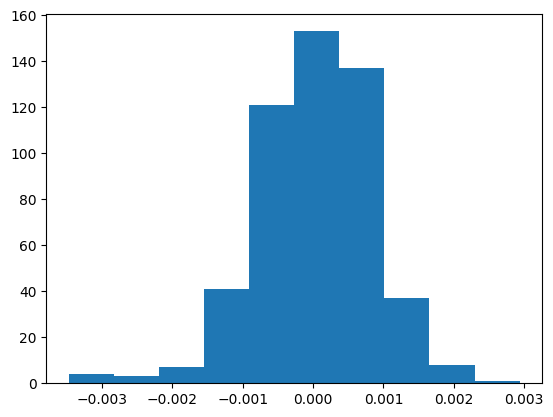

In [25]:
plt.hist((np.array(res['outputs'][1]['data']) - pooled_output_clip).reshape(-1))

In [13]:
import requests 

In [15]:
input_json = {
   "inputs":[
      {	
         "name": "embs",
         "shape": [2,512],
         "datatype": "FP32",
         "data": [1.] * (512 * 2)
      },
      {	
         "name": "collections",
         "shape": [2,1],
         "datatype": "BYTES",
         "data": ["product_collection_clip_image", "x"]
      },
      {	
         "name": "limits",
         "shape": [2,1],
         "datatype": "INT64",
         "data": [10, 5]
      }
   ]
}

res = requests.post(
    'http://localhost:8000/v2/models/ann_search/versions/1/infer', 
    json=input_json
).json()

In [11]:
import json

In [21]:
input_json = {
   "inputs":[
      {	
         "name": "embs",
         "shape": [2,512],
         "datatype": "FP32",
         "data": [1.] * (512 * 2)
      }
   ]
}

res = requests.post(
    'http://localhost:8000/v2/models/product_collection_emb2annrequest/versions/1/infer', 
    json=input_json
).json()

In [25]:
input_json = {
   "inputs":[
      {	
         "name": "text",
         "shape": [1,1],
         "datatype": "BYTES",
         "data": ["hello"]
      }
   ]
}

res = requests.post(
    'http://localhost:8000/v2/models/product_collection_keyword2annresponse_ensemble/versions/1/infer', 
    json=input_json
).json()

In [26]:
res

{'model_name': 'product_collection_keyword2annresponse_ensemble',
 'model_version': '1',
 'parameters': {'sequence_id': 0,
  'sequence_start': False,
  'sequence_end': False},
 'outputs': [{'name': 'success',
   'datatype': 'BOOL',
   'shape': [1],
   'data': [True]},
  {'name': 'responses',
   'datatype': 'BYTES',
   'shape': [1],
   'data': ['[{"id": 2621, "version": 2, "score": 0.12753573, "payload": {"average_rating": 5.0, "dt": "2023-04-09", "gmv_365d": 47.405548095703125, "image_hash": "0e6fd5d511eaa5a0fbb1f7bbe48952d4", "merchant_id": "589bde9c07e261500c535d28", "name": "INCERUN Men\'s Slim Fit Pants Drawstring Chino Dress Pants Leisure Trousers", "product_id": "6322d4d1fe1657e622dac172", "rating_count": 0.0, "refund_rate": 0.0, "wss_tier": "Gold"}, "vector": null}, {"id": 9490, "version": 9, "score": 0.12565525, "payload": {"average_rating": 5.0, "dt": "2023-04-09", "gmv_365d": 25.296710968017575, "image_hash": "0751ec26b85cdc3a2ab4c6418fc0fd5f", "merchant_id": "574054473a698c4